In [51]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plot
housing = pd.read_csv("SD1970_housing.csv")

In [52]:
housing = housing[["Place Name", "Total housing units", " Total owner occupied average $ value of housing units "]]

In [53]:
housing = housing[~pd.isnull(housing["Place Name"])]

In [54]:
housing = housing.rename(columns={" Total owner occupied average $ value of housing units ": "Average price"})

In [55]:
housing

,Place Name,Total housing units,Average price
0,San Diego,302,"$32,298.00"
1,San Diego,234,"$29,485.00"
2,San Diego,176,"$37,151.00"
3,San Diego,159,"$44,712.00"
4,San Diego,209,"$33,229.00"
...,...,...,...
1252,Carlsbad,135,"$28,460.00"
1253,San Marcos,0,$-
1255,Vista,11,"$32,222.00"
1258,Vista,35,"$28,269.00"


In [56]:
housing["Average price"] = housing["Average price"].str.replace(r'[^\w\s]+', '')
housing["Average price"] = housing["Average price"].str.rstrip()
housing = housing[housing["Average price"]!=""]

In [57]:
housing["Total housing units"] = housing["Total housing units"].str.replace(r'[^\w\s]+', '')
housing["Total housing units"] = housing["Total housing units"].str.rstrip()

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
housing["Average price"] = housing["Average price"].astype(int)
housing["Average price"] = housing["Average price"]/100

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
housing["Total housing units"] = housing["Total housing units"].astype(int)

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
housing["Total price"] = housing["Total housing units"] * housing["Average price"]

/Users/zhaoruidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
housing = housing.groupby(["Place Name"]).sum()
housing = housing.drop(["Average price"], axis = 1)

In [62]:
housing["Average price"] = housing["Total price"]/housing["Total housing units"]

In [63]:
housing = housing.sort_values("Average price", ascending = False)
housing = housing.drop(["Total housing units", "Total price"], axis = 1)

In [65]:
housing

,Average price
Place Name,
Grossmont Mount Helix,43034.288718
Del Mar,38003.456522
Coronado,37452.887819
Solana Beach,28385.477348
Carlsbad,25972.937755
La Mesa,24768.105744
Cardiff by the Sea,24526.130922
Encinitas,24040.106867
San Diego,24029.803670


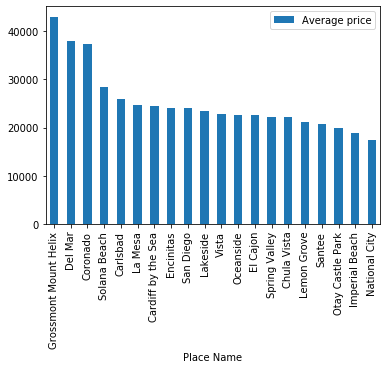

In [64]:
housing.plot.bar()